In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

red = '#e8321b'
blue = '#1b69e8'

In [2]:
import os
import pandas as pd

In [3]:
#path = '../sparse/pretraining_output-small-300k/eval_results_att.txt'
path = '../large-corpus/pretraining_output-400k/eval_results_att.txt'

Load vocabulary

In [4]:
#vocab = pd.read_csv('../sparse/sparse_tmp_vocab-code.txt', header=None)
vocab = pd.read_csv('../large-corpus/global_vocab.csv', header=None)
vocab.shape

(9769, 1)

Load predictions results

In [5]:
#results_df = pd.read_csv('../sparse/pretraining_output-300k/eval_results_masked_lm.txt')
results_df = pd.read_csv('../large-corpus/pretraining_output-400k/eval_results_masked_lm.txt')
results_df.head(10)

,masked_lm_predictions,label_ids,masked_lm_positions,0,1,2,3,4,5,6,...,54,55,56,57,58,59,60,61,62,63
0,221,377,14,2,11,8,3130,156,654,262,...,0,0,0,0,0,0,0,0,0,0
1,1814,1814,16,2,11,22,3597,102,212,8,...,0,0,0,0,0,0,0,0,0,0
2,8,8,7,2,25,20,22,26,8,20,...,0,0,0,0,0,0,0,0,0,0
3,8,8,2,2,11,4,3618,2928,415,8,...,0,0,0,0,0,0,0,0,0,0
4,22,22,6,2,399,24,24,24,24,22,...,0,0,0,0,0,0,0,0,0,0
5,60,60,6,2,20,22,43,8,27,4,...,0,0,0,0,0,0,0,0,0,0
6,8,8,21,2,31,32,33,414,37,24,...,0,0,0,0,0,0,0,0,0,0
7,24,24,38,2,6,15,17,7,24,74,...,0,0,0,0,0,0,0,0,0,0
8,65,65,4,2,6,7,8,4,24,11,...,0,0,0,0,0,0,0,0,0,0
9,7,7,13,2,15,17,20,8,8,24,...,0,0,0,0,0,0,0,0,0,0


Get the prediction specific to this attention matrix

In [6]:
pred = list(results_df.loc[0][3:])
pred_str = [vocab.loc[i][0] for i in pred]
pred_str

['[CLS]',
 'assign',
 'name',
 'optimizer',
 'weight',
 'names',
 'listcomp',
 'call',
 'attribute',
 'decode',
 'name',
 'str',
 'comprehension',
 'name',
 '[MASK]',
 'subscript',
 'name',
 'index',
 'str',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]']

In [7]:
# Actual sentence length, unpadded
emb_len = np.count_nonzero(pred)
emb_len

19

In [8]:
print(' '.join(pred_str[:emb_len]))
print('Label =', vocab.loc[results_df.loc[0][0]][0])
print('Pred  =', vocab.loc[results_df.loc[0][1]][0])

[CLS] assign name optimizer weight names listcomp call attribute decode name str comprehension name [MASK] subscript name index str
Label = layer
Pred  = n


Read the attention values

In [9]:
ar = np.asarray(pd.read_csv(path, sep=' ', header=None))[:,:-1]
ar.shape

(18, 4096)

In [10]:
depth = 3
nb_heads = 6
seq_len  = 64
attention = ar.reshape((depth, nb_heads, seq_len, seq_len))

Plot attention matrices

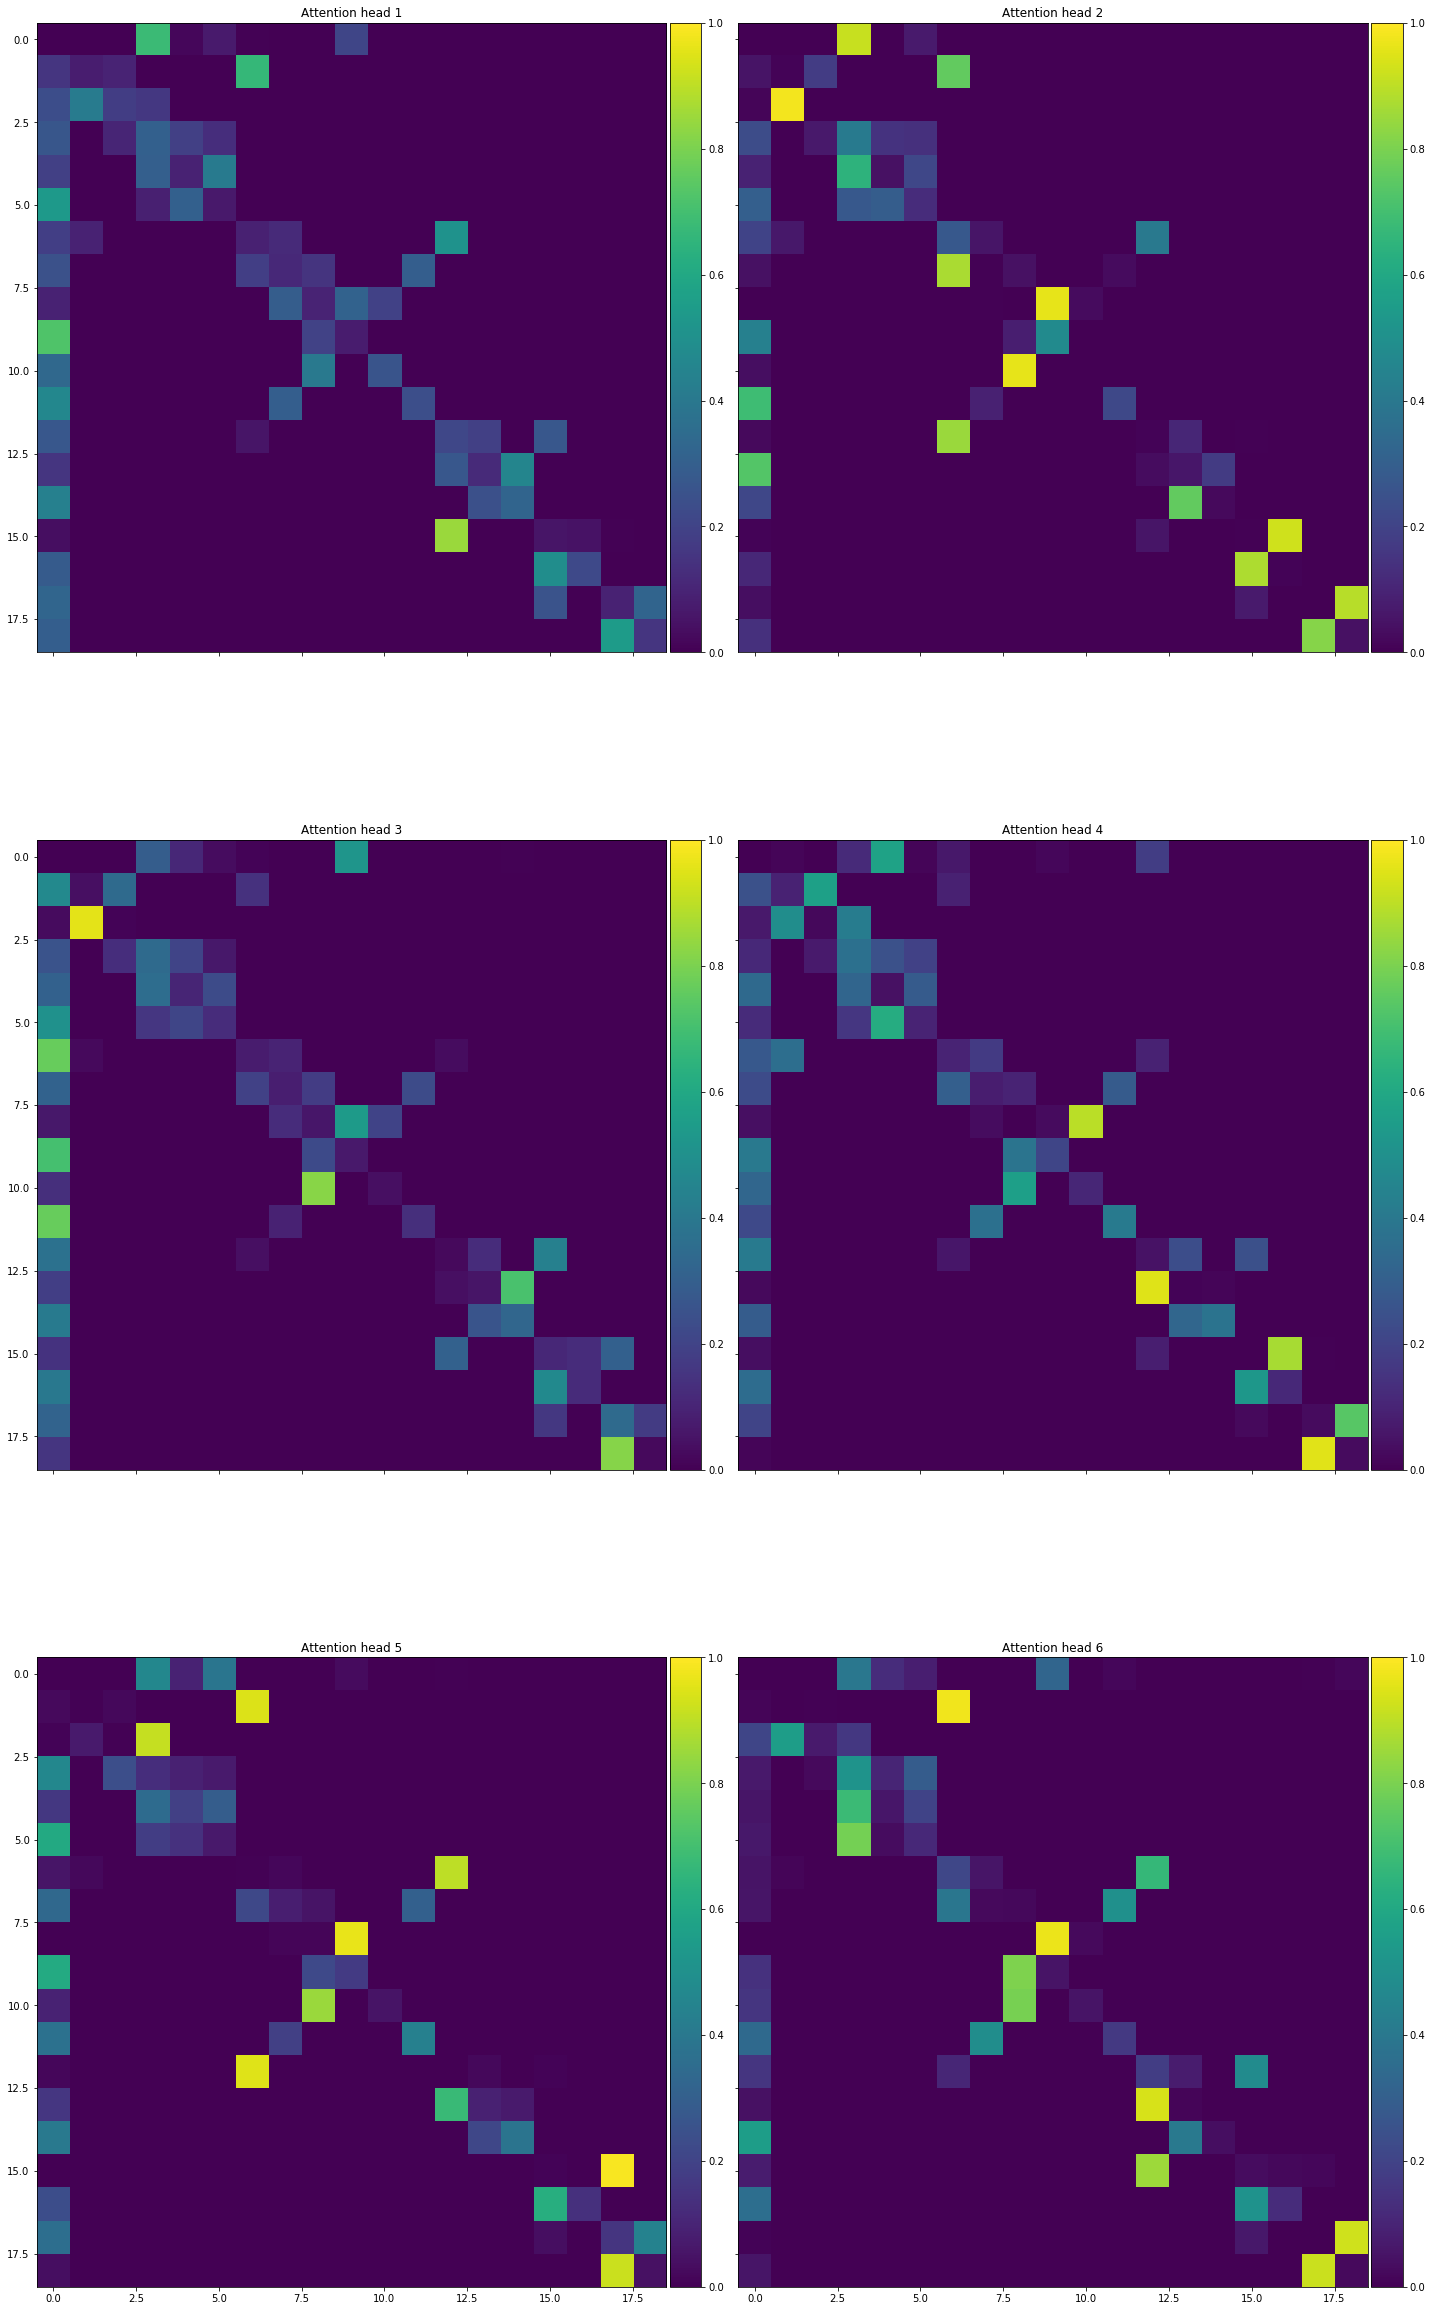

In [11]:
f, axes = plt.subplots(3, 2, sharex='col', sharey='row', figsize=(20,40))
#f.suptitle('Attention head probabilities (Layer #12)')
d = 0
for i, ax in enumerate(axes.flatten()):
    im = ax.imshow(attention[d, i, :emb_len, :emb_len])
    ax.set_title("Attention head {}".format(i+1))
    im.set_clim(0, 1)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    f.colorbar(im, cax=cax, orientation='vertical')
    
    plt.tight_layout()
plt.show()

Load adjacency matrix

In [12]:
from scipy import io

In [13]:
m = io.mmread('../large-corpus/adj/'+str(0)+'_keras_mlm_split_magret_adj_val.mtx')
A = m.toarray()
A.shape

(64, 64)

In [14]:
pd_adj = pd.read_csv('../large-corpus/pretraining_output-400k/eval_results_adj.txt', header=None)

In [15]:
A = np.asarray(pd_adj)[0].reshape((64,64))

In [16]:
#adj_df = pd.read_csv('../funcname_magret/cls_with_funcsplit_magret_adj_single.txt', header=None)
#A = np.asarray(adj_df)

In [17]:
import networkx as nx

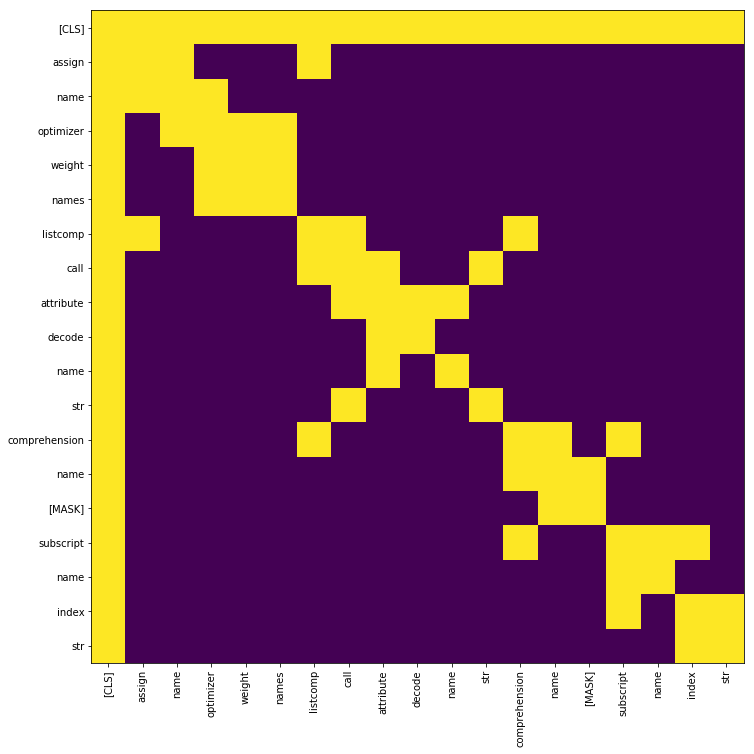

In [18]:
plt.figure(figsize=(12,12))
plt.imshow(A[:emb_len,:emb_len])
plt.xticks(range(emb_len), pred_str[:emb_len], rotation=90);
plt.yticks(range(emb_len), pred_str[:emb_len]);

In [52]:
A[emb_len-1,:]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [53]:
G=nx.from_numpy_matrix(A[:emb_len,:emb_len])
#G.remove_node(0)

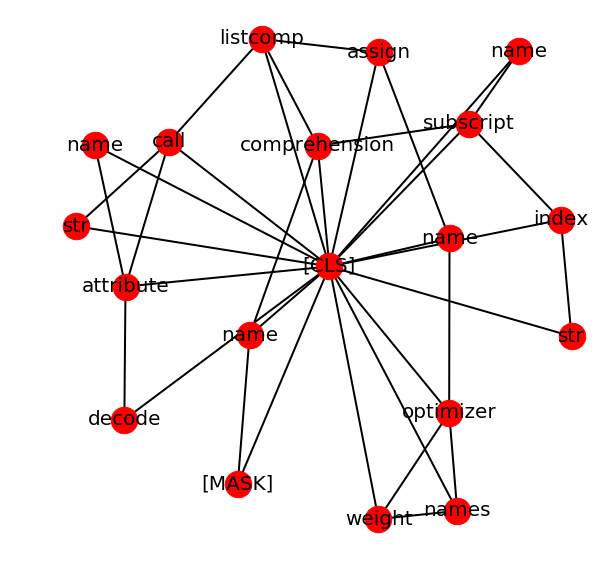

In [54]:
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G)  # positions for all nodes
# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)
# edges
nx.draw_networkx_edges(G, pos, width=2)
# labels
nx.draw_networkx_labels(G, pos, labels=dict(zip(range(emb_len),pred_str[:emb_len])), font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()

In [22]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18))

In [23]:
cls_edges = list(G.edges(0))
G.remove_edges_from(cls_edges)

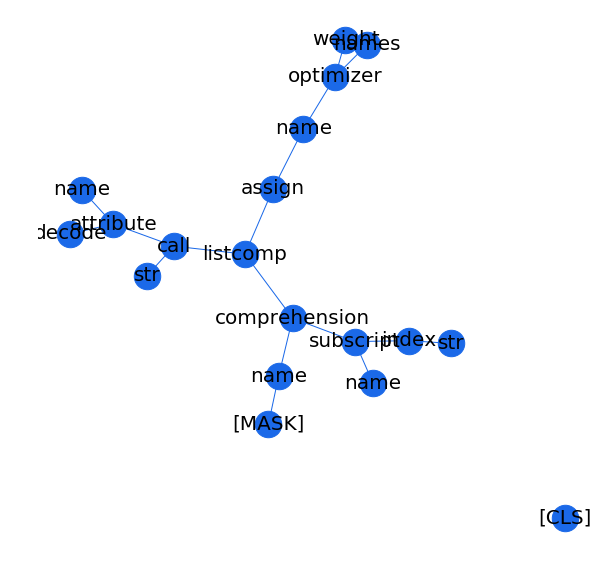

In [32]:
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G)  # positions for all nodes
# nodes
nx.draw_networkx_nodes(G, pos, node_size=700, node_color=blue)
# edges
nx.draw_networkx_edges(G, pos, width=1, edge_color=blue)
# labels
nx.draw_networkx_labels(G, pos, labels=dict(zip(range(emb_len),pred_str[:emb_len])), font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()

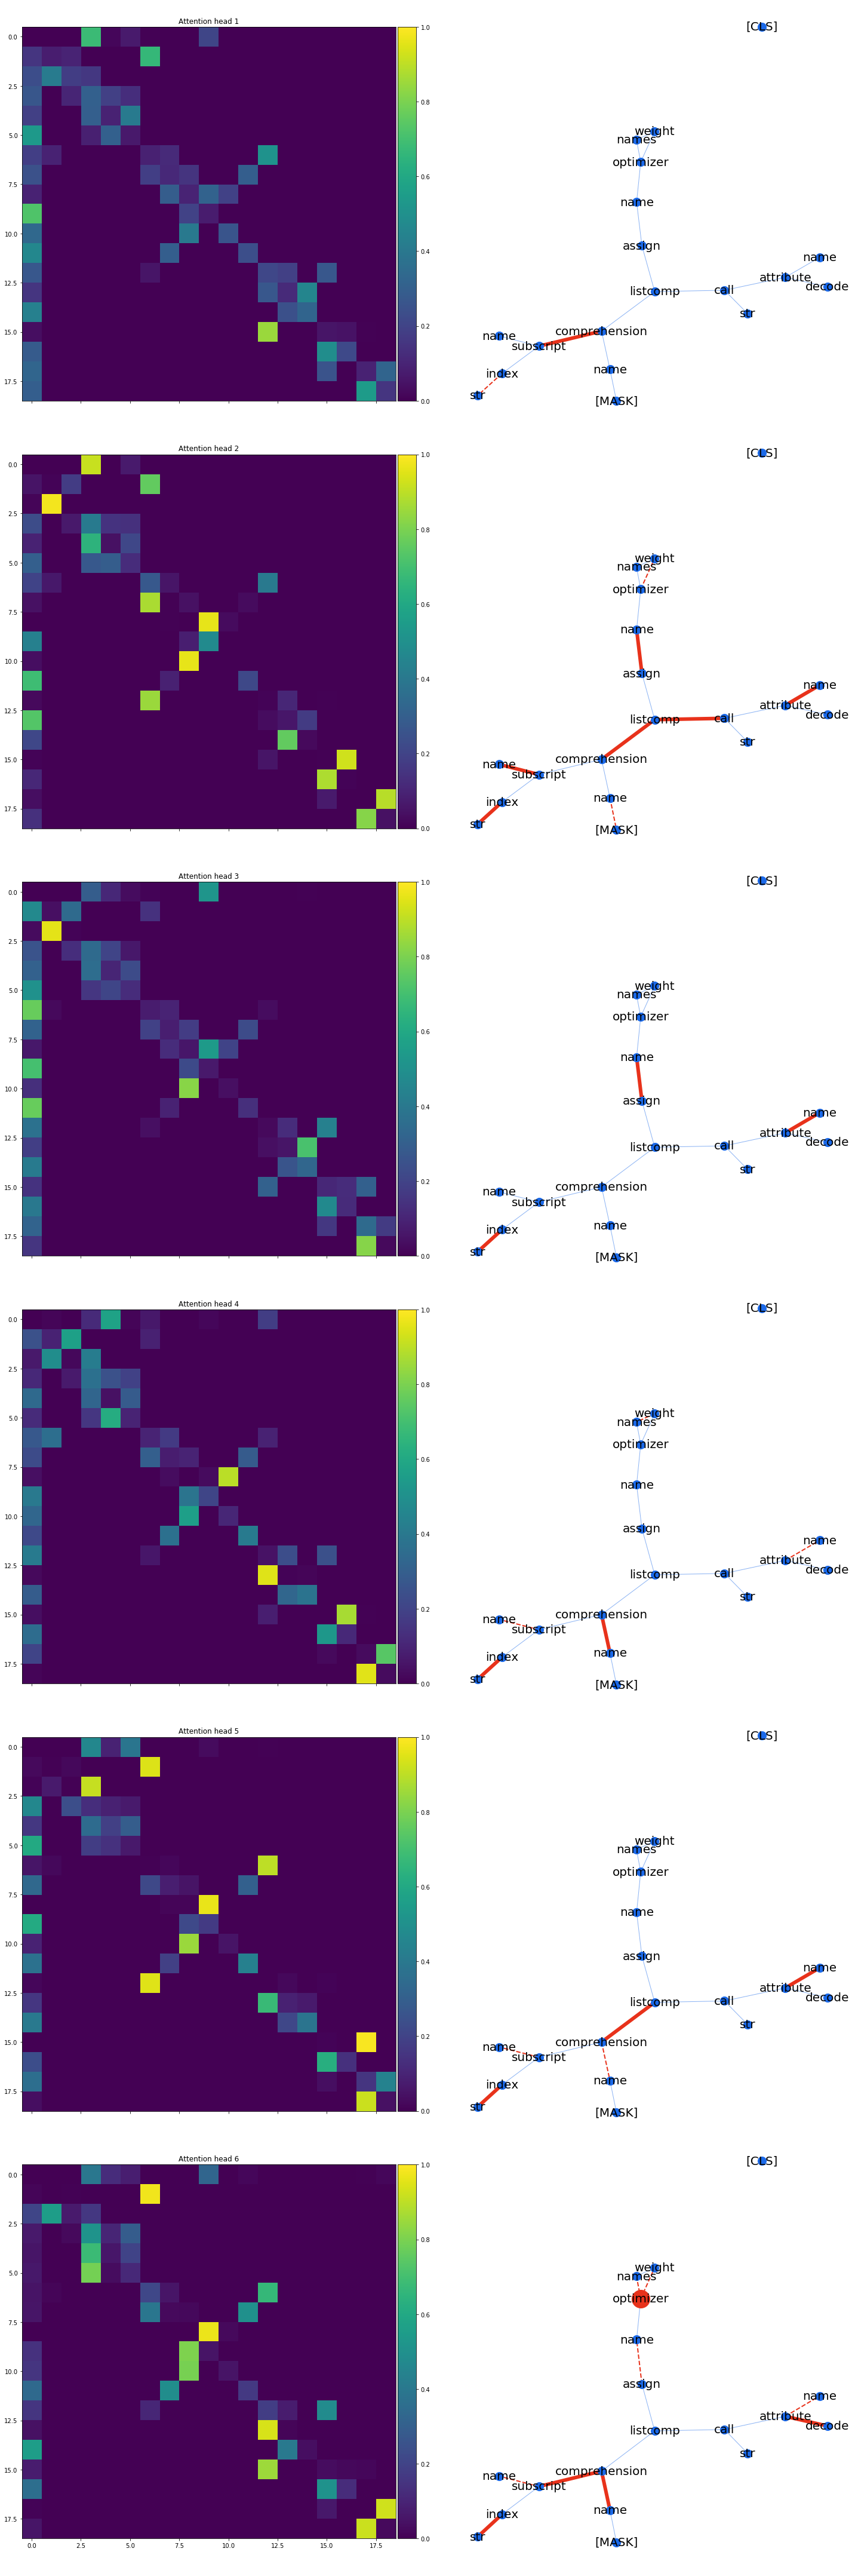

In [26]:
############# WITHOUT CLS
f, axes = plt.subplots(nb_heads, 2, sharex='col', figsize=(20,60))

#G0  = nx.from_numpy_matrix(attention[0, 1:emb_len, 1:emb_len])
#pos = nx.spring_layout(G0)  # positions for all nodes
labels = dict(zip(range(emb_len),pred_str[:emb_len]))

d = 0
#f.suptitle('Attention head probabilities (Layer #12)')
for i, (ax0, ax1) in enumerate(axes):
    # Attention map
    im = ax0.imshow(attention[d, i, :emb_len, :emb_len])
    ax0.set_title("Attention head {}".format(i+1))
    im.set_clim(0, 1)
    divider = make_axes_locatable(ax0)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    f.colorbar(im, cax=cax, orientation='vertical')
    
    # -----------------------------------------------------
    # graph
    Gi = nx.from_numpy_matrix(attention[d, i, :emb_len, :emb_len])
    #Gi.remove_node(0)
    show_cls = lambda u:(u>0)

    
    evlarge = [(u, v) for (u, v, d) in Gi.edges(data=True) if (d['weight'] > 0.8) & show_cls(u)]
    elarge  = [(u, v) for (u, v, d) in Gi.edges(data=True) if (d['weight'] > 0.5) & (d['weight'] <= 0.8) & show_cls(u)]
    esmall  = [(u, v) for (u, v, d) in Gi.edges(data=True) if (d['weight'] <= 0.5) & show_cls(u)]
    
    lg_self_att = [u for (u,v,d) in Gi.edges(data=True) if (d['weight'] > 0.5) &(u==v)]
    sm_self_att = [u for (u,v,d) in Gi.edges(data=True) if (d['weight'] <= 0.5)&(u==v)]

    # nodes
    nx.draw_networkx_nodes(Gi, pos, nodelist=lg_self_att, node_size=900, ax=ax1, node_color=red)
    nx.draw_networkx_nodes(Gi, pos, nodelist=sm_self_att, node_size=200, ax=ax1, node_color=blue)

    # edges
    nx.draw_networkx_edges(Gi, pos, edgelist=evlarge, width=6, ax=ax1, edge_color=red)
    nx.draw_networkx_edges(Gi, pos, edgelist=elarge,  width=2, ax=ax1, edge_color=red, style='dashed')
    nx.draw_networkx_edges(Gi, pos, edgelist=esmall,  width=1, ax=ax1, alpha=0.5, edge_color=blue)

    # labels
    nx.draw_networkx_labels(Gi, pos, labels=labels, font_size=20, font_family='sans-serif', ax=ax1)

    ax1.axis('off')

    plt.tight_layout()
    
plt.show()

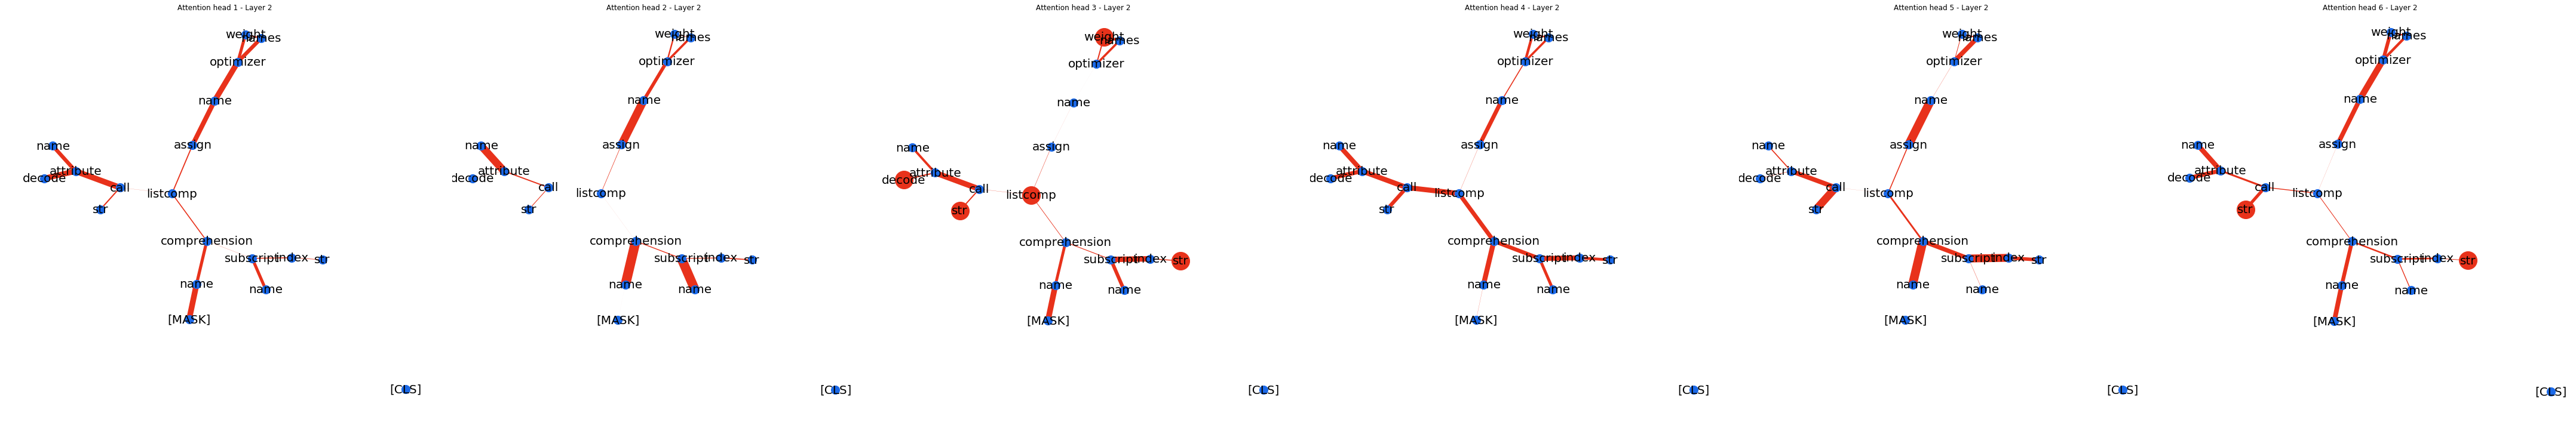

In [49]:
############# WITHOUT CLS
f, axes = plt.subplots(1, nb_heads, sharex='col', figsize=(60,10))

#G0  = nx.from_numpy_matrix(attention[0, 1:emb_len, 1:emb_len])
#pos = nx.spring_layout(G0)  # positions for all nodes
labels = dict(zip(range(emb_len),pred_str[:emb_len]))

d = 2
#f.suptitle('Attention head probabilities (Layer #12)')
for i, ax in enumerate(axes):
        # Attention map
        #im = ax0.imshow(attention[d, i, :emb_len, :emb_len])
        #ax0.set_title("Attention head {}".format(i+1))
        #im.set_clim(0, 1)
        #divider = make_axes_locatable(ax0)
        #cax = divider.append_axes('right', size='5%', pad=0.05)
        #f.colorbar(im, cax=cax, orientation='vertical')

        ax.set_title("Attention head {} - Layer {}".format(i+1, d))
        # -----------------------------------------------------
        # graph
        Gi = nx.from_numpy_matrix(attention[d, i, :emb_len, :emb_len])
        #Gi.remove_node(0)
        show_cls = lambda u:(u>0)

        weights = [d['weight']*5 for (u, v, d) in Gi.edges(data=True) if show_cls(u)]
        edges = [(u,v) for (u, v, d) in Gi.edges(data=True) if show_cls(u)]
        weights = [weight*len(edges)*3.0/sum(weights) for weight in weights]
        
        evlarge = [(u, v) for (u, v, d) in Gi.edges(data=True) if (d['weight'] > 0.5) & show_cls(u)]
        elarge  = [(u, v) for (u, v, d) in Gi.edges(data=True) if (d['weight'] > 0.5) & (d['weight'] <= 0.8) & show_cls(u)]
        esmall  = [(u, v) for (u, v, d) in Gi.edges(data=True) if (d['weight'] <= 0.5) & show_cls(u)]

        lg_self_att = [u for (u,v,d) in Gi.edges(data=True) if (d['weight'] > 0.5) &(u==v)]
        sm_self_att = [u for (u,v,d) in Gi.edges(data=True) if (d['weight'] <= 0.5)&(u==v)]

        # nodes
        nx.draw_networkx_nodes(Gi, pos, nodelist=lg_self_att, node_size=900, ax=ax, node_color=red)
        nx.draw_networkx_nodes(Gi, pos, nodelist=sm_self_att, node_size=200, ax=ax, node_color=blue)

        # edges
        nx.draw_networkx_edges(Gi, pos, edgelist=edges, width=weights, ax=ax, edge_color=red)
        #nx.draw_networkx_edges(Gi, pos, edgelist=evlarge, width=6, ax=ax, edge_color=red)
        #nx.draw_networkx_edges(Gi, pos, edgelist=elarge,  width=2, ax=ax, edge_color=red, style='dashed')
        #nx.draw_networkx_edges(Gi, pos, edgelist=esmall,  width=1, ax=ax, alpha=0.5, edge_color=blue)

        # labels
        nx.draw_networkx_labels(Gi, pos, labels=labels, font_size=20, font_family='sans-serif', ax=ax)

        ax.axis('off')

        plt.tight_layout()
    
plt.show()

In [29]:
list(axs)

TypeError: 'AxesSubplot' object is not iterable

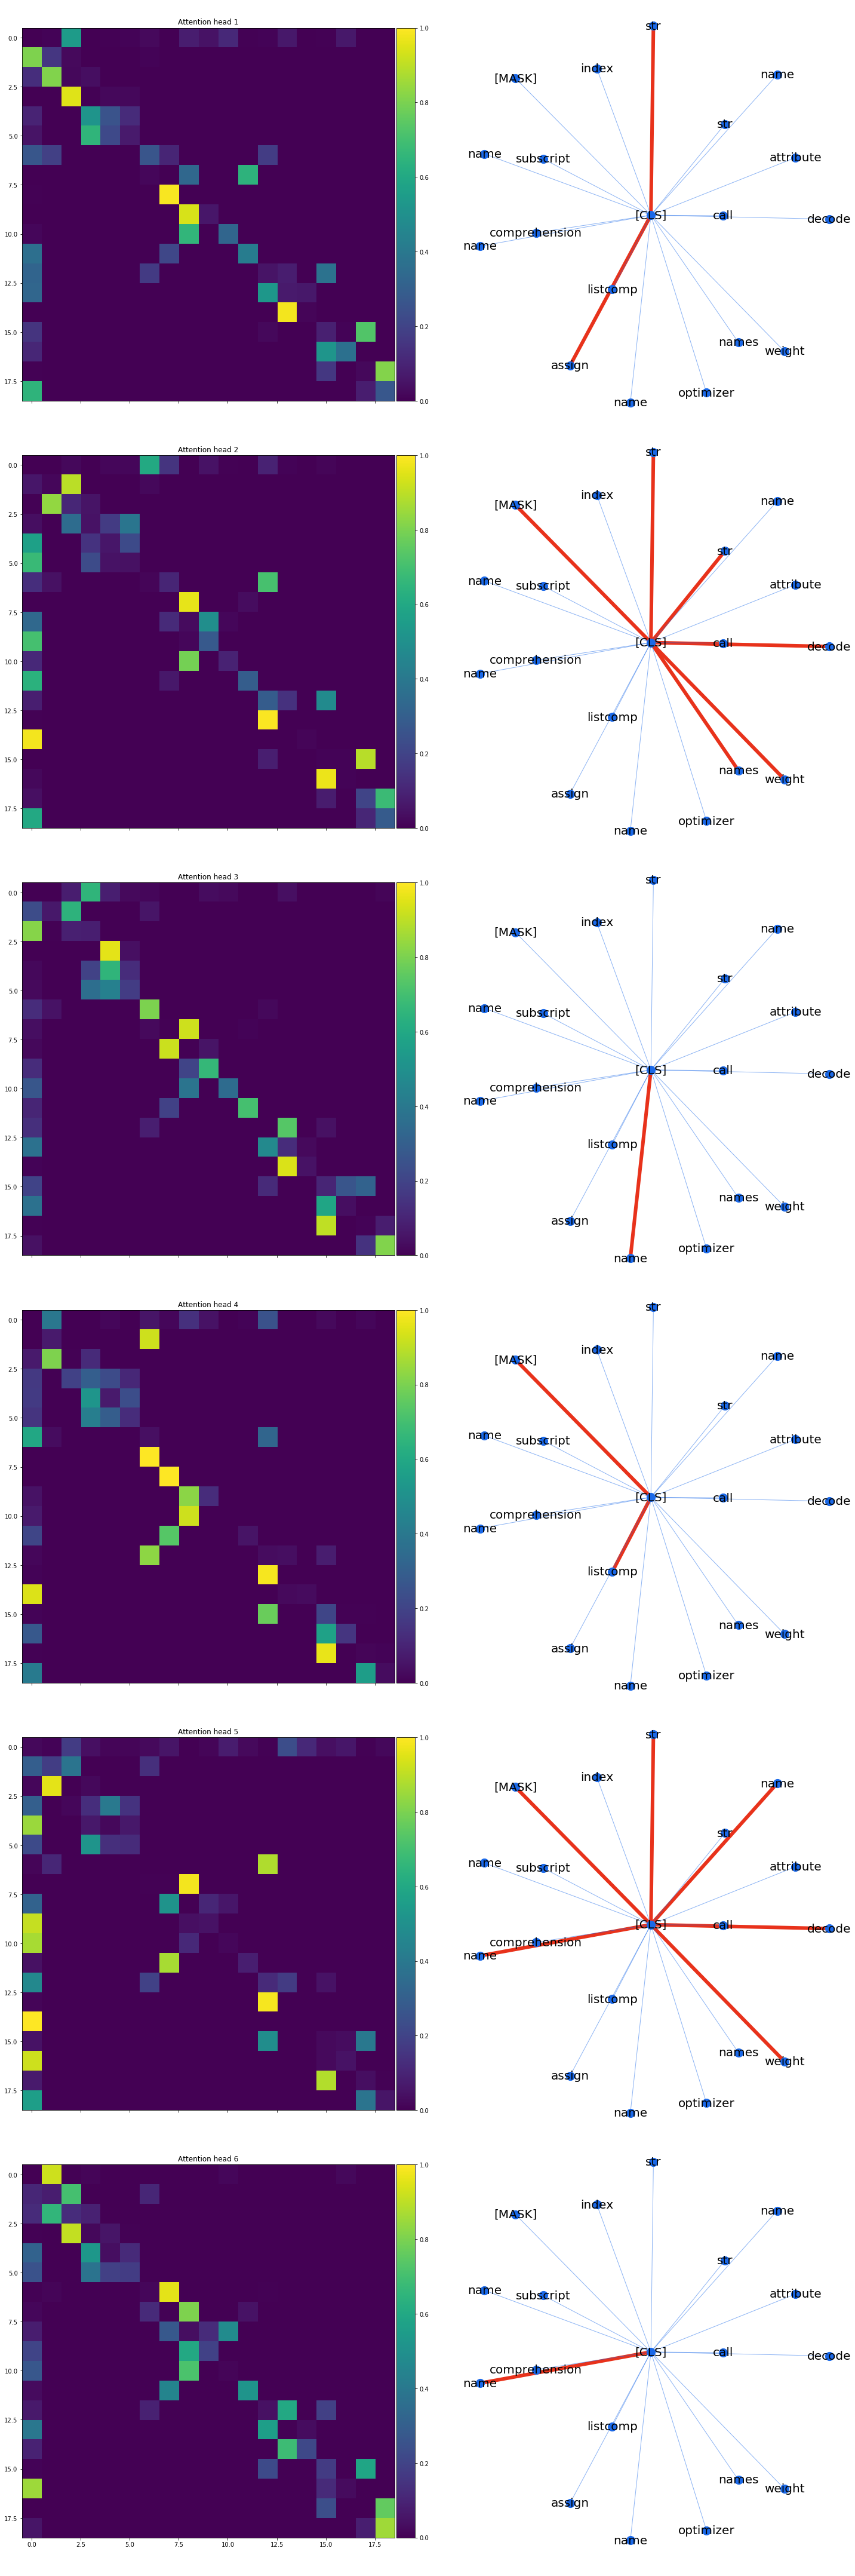

In [122]:
################### WITH CLS ################
f, axes = plt.subplots(nb_heads, 2, sharex='col', figsize=(20,60))

#G0  = nx.from_numpy_matrix(attention[0, 1:emb_len, 1:emb_len])
#pos = nx.spring_layout(G0)  # positions for all nodes
labels = dict(zip(range(emb_len),pred_str[:emb_len]))

d = 2
#f.suptitle('Attention head probabilities (Layer #12)')
for i, (ax0, ax1) in enumerate(axes):
    # Attention map
    im = ax0.imshow(attention[d, i, :emb_len, :emb_len])
    ax0.set_title("Attention head {}".format(i+1))
    im.set_clim(0, 1)
    divider = make_axes_locatable(ax0)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    f.colorbar(im, cax=cax, orientation='vertical')
    
    # -----------------------------------------------------
    # graph
    Gi = nx.from_numpy_matrix(attention[d, i, :emb_len, :emb_len])
    #Gi.remove_node(0)
    #show_cls = lambda u:(u>0)
    show_cls = lambda u:(u==0)
    
    evlarge = [(u, v) for (u, v, d) in Gi.edges(data=True) if (d['weight'] > 0.8) & show_cls(u)]
    elarge  = [(u, v) for (u, v, d) in Gi.edges(data=True) if (d['weight'] > 0.5) & (d['weight'] <= 0.8) & show_cls(u)]
    esmall  = [(u, v) for (u, v, d) in Gi.edges(data=True) if (d['weight'] <= 0.5) & show_cls(u)]
     
    evlarge = [(u, v) for (u, v, d) in Gi.edges(data=True) if (d['weight'] > 0.5) & show_cls(u)]
    esmall  = [(u, v) for (u, v, d) in Gi.edges(data=True) if (d['weight'] <= 0.5) & show_cls(u)]
    #esmall  = [(u, v) for (u, v) in G.edges() if (u>0)]
    
    sm_self_att = [u for (u,v,d) in Gi.edges(data=True) if (d['weight'] <= 1) &(u==v)]

    # nodes
    nx.draw_networkx_nodes(Gi, pos, nodelist=sm_self_att, node_size=200, ax=ax1, node_color=blue)

    # edges
    nx.draw_networkx_edges(Gi, pos, edgelist=evlarge, width=6, ax=ax1, edge_color=red)
    nx.draw_networkx_edges(Gi, pos, edgelist=esmall,  width=1, ax=ax1, alpha=0.5, edge_color=blue)

    # labels
    nx.draw_networkx_labels(Gi, pos, labels=labels, font_size=20, font_family='sans-serif', ax=ax1)

    ax1.axis('off')

    plt.tight_layout()
    
plt.show()

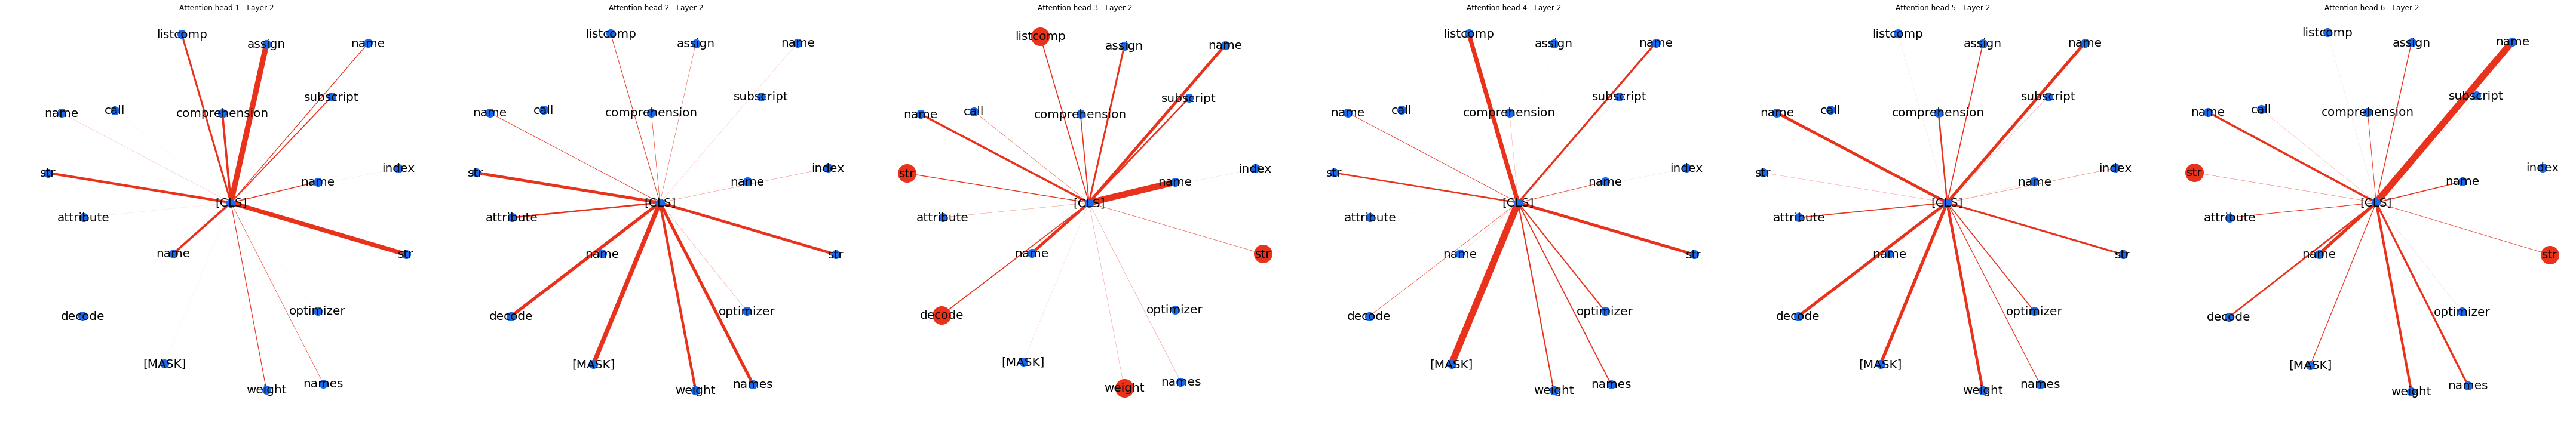

In [67]:
############# WITH CLS
f, axes = plt.subplots(1, nb_heads, sharex='col', figsize=(60,10))

#G0  = nx.from_numpy_matrix(attention[0, 1:emb_len, 1:emb_len])
#pos = nx.spring_layout(G0)  # positions for all nodes
labels = dict(zip(range(emb_len),pred_str[:emb_len]))

d = 2
#f.suptitle('Attention head probabilities (Layer #12)')
for i, ax in enumerate(axes):
        # Attention map
        #im = ax0.imshow(attention[d, i, :emb_len, :emb_len])
        #ax0.set_title("Attention head {}".format(i+1))
        #im.set_clim(0, 1)
        #divider = make_axes_locatable(ax0)
        #cax = divider.append_axes('right', size='5%', pad=0.05)
        #f.colorbar(im, cax=cax, orientation='vertical')

        ax.set_title("Attention head {} - Layer {}".format(i+1, d))
        # -----------------------------------------------------
        # graph
        Gi = nx.from_numpy_matrix(attention[d, i, :emb_len, :emb_len])
        #Gi.remove_node(0)
        show_cls = lambda u:(u==0)

        weights = [d['weight'] for (u, v, d) in Gi.edges(data=True) if show_cls(u)]
        edges = [(u,v) for (u, v, d) in Gi.edges(data=True) if show_cls(u)]
        weights = [weight*len(edges)*2.0/sum(weights) for weight in weights]
        
        evlarge = [(u, v) for (u, v, d) in Gi.edges(data=True) if (d['weight'] > 0.5) & show_cls(u)]
        elarge  = [(u, v) for (u, v, d) in Gi.edges(data=True) if (d['weight'] > 0.5) & (d['weight'] <= 0.8) & show_cls(u)]
        esmall  = [(u, v) for (u, v, d) in Gi.edges(data=True) if (d['weight'] <= 1) & ~(show_cls(u))]

        lg_self_att = [u for (u,v,d) in Gi.edges(data=True) if (d['weight'] > 0.5) &(u==v)]
        sm_self_att = [u for (u,v,d) in Gi.edges(data=True) if (d['weight'] <= 0.5)&(u==v)]

        # nodes
        nx.draw_networkx_nodes(Gi, pos, nodelist=lg_self_att, node_size=900, ax=ax, node_color=red)
        nx.draw_networkx_nodes(Gi, pos, nodelist=sm_self_att, node_size=200, ax=ax, node_color=blue)

        # edges
        nx.draw_networkx_edges(Gi, pos, edgelist=edges, width=weights, ax=ax, edge_color=red)
        #nx.draw_networkx_edges(Gi, pos, edgelist=evlarge, width=6, ax=ax, edge_color=red)
        #nx.draw_networkx_edges(Gi, pos, edgelist=elarge,  width=2, ax=ax, edge_color=red, style='dashed')
        #nx.draw_networkx_edges(Gi, pos, edgelist=esmall,  width=1, ax=ax, alpha=0.5, edge_color=blue)

        # labels
        nx.draw_networkx_labels(Gi, pos, labels=labels, font_size=20, font_family='sans-serif', ax=ax)

        ax.axis('off')

        plt.tight_layout()
    
plt.show()

In [103]:
dict(zip(range(emb_len),pred_str[:emb_len]))

{0: '[CLS]',
 1: 'assign',
 2: 'name',
 3: 'optimizer',
 4: 'weight',
 5: 'names',
 6: 'listcomp',
 7: 'call',
 8: 'attribute',
 9: 'decode',
 10: 'name',
 11: 'str',
 12: 'comprehension',
 13: 'name',
 14: '[MASK]',
 15: 'subscript',
 16: 'name',
 17: 'index',
 18: 'str'}

In [68]:
Gi.edges()

EdgeView([(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (1, 1), (1, 2), (1, 6), (2, 2), (2, 3), (3, 3), (3, 4), (3, 5), (4, 4), (4, 5), (5, 5), (6, 12), (6, 6), (6, 7), (7, 8), (7, 11), (7, 7), (8, 8), (8, 10), (8, 9), (9, 9), (10, 10), (11, 11), (12, 12), (12, 13), (12, 15), (13, 13), (13, 14), (14, 14), (15, 16), (15, 17), (15, 15), (16, 16), (17, 17), (17, 18), (18, 18)])

In [69]:
from scipy.stats import entropy

In [70]:
idx = np.nonzero(A)
uni = np.zeros(A.shape)
uni.shape
for (i,j) in zip(*idx):
    uni[i,j] = np.random.uniform()
uniform_ent = entropy(uni,base=2)

In [83]:
len(uniform_ent)

64

In [71]:
attention.shape

(3, 6, 64, 64)

In [112]:
def plot_entropy_for_layer(attention, nb_heads, uniform_ent, d=0):
    
    ent = [entropy(a,base=2) for a in attention[d]]
    f, axes = plt.subplots(nb_heads//3+1, 3, sharex=False, figsize=(20,6))
    
    for i, (ax0, ax1,ax2) in enumerate(axes):
        if i < 2:
            ent[i][np.isnan(ent[i])]=5.36
            ax0.hist(ent[i],bins=20);
            ax0.set_title('Entropy - Head {} / Layer {}'.format(i,d))
            ax0.set_xticks(range(7))
            #ax0.set_yticks(range(5))
            ax1.set_title('Entropy - Head {} / Layer {}'.format(i+1,d))
            ax1.hist(ent[i+1],bins=20);
            ax1.set_xticks(range(7))
            #ax1.set_yticks(range(5))
            ax2.set_title('Entropy - Head {} / Layer {}'.format(i+2,d))
            ax2.hist(ent[i+2],bins=20);
            ax2.set_xticks(range(7))
        else:
            ax0.axis('off')
            ax2.axis('off')
            ax1.set_title('Entropy - Random Uniform Edge weights')
            ax1.hist(uniform_ent, bins=20);
            ax1.set_xticks(range(7))
    plt.tight_layout()
    
    #plt.figure(figsize=(20,3));
    #plt.hist(uniform_ent, bins=20);
    #plt.xticks(range(7));
    #plt.yticks(range(5));

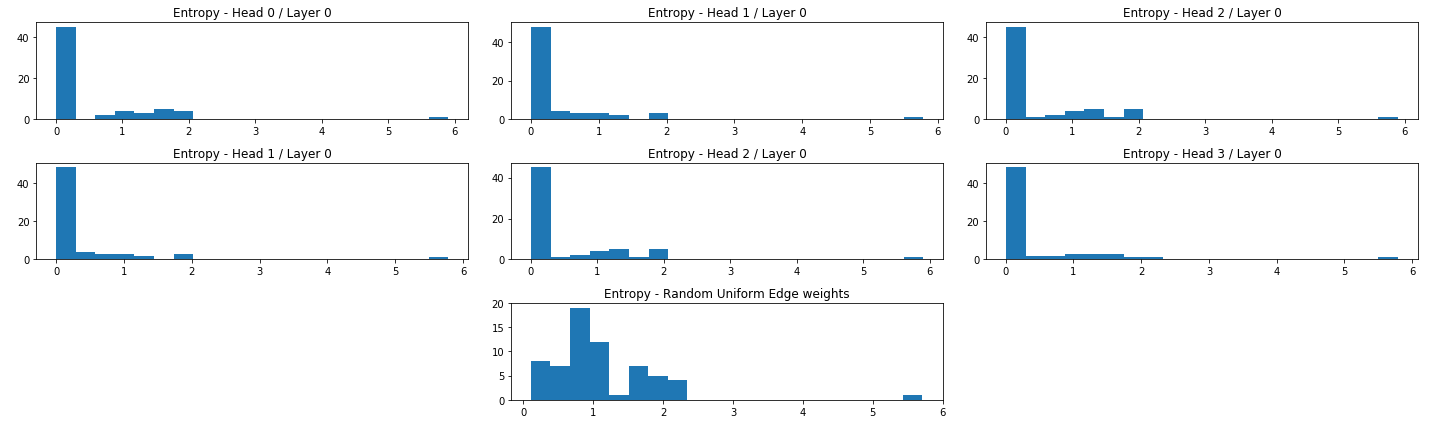

In [113]:
plot_entropy_for_layer(attention, nb_heads, uniform_ent)

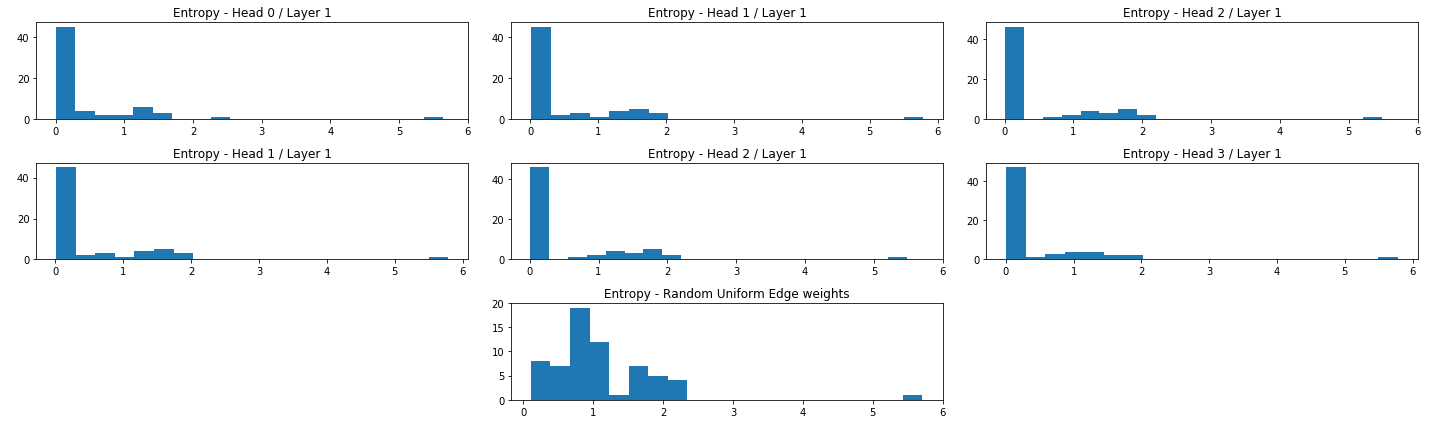

In [114]:
plot_entropy_for_layer(attention, nb_heads, uniform_ent, d=1)

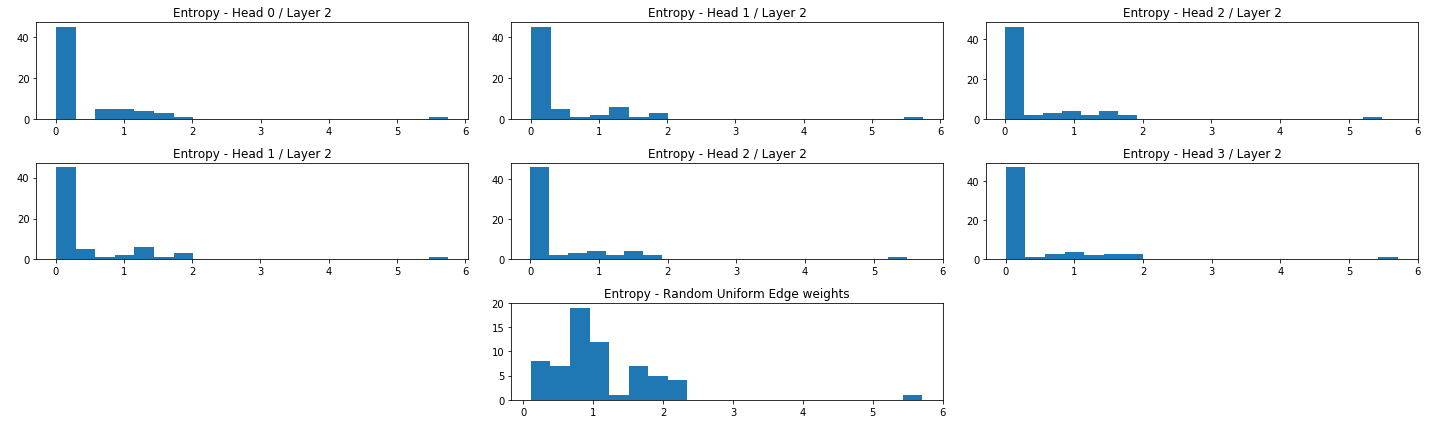

In [115]:
plot_entropy_for_layer(attention, nb_heads, uniform_ent, d=2)

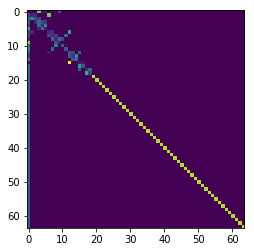

In [76]:
plt.imshow(attention[0,0])